## Problem in KMeans

While KMeans is a good algorithm, its time complexity is very poor. KMeans works in $$O(n \cdot K \cdot I \cdot f)$$, where:
- \( n \) is the number of records,
- \( K \) is the number of clusters,
- \( I \) is the number of iterations,
- \( f \) is the number of features in a particular record.

Clearly, the algorithm will take forever to complete on a dataset of more than 100,000 data points.

## Minibatch KMeans

### Main Features of Minibatch KMeans

- Instead of using the entire dataset at once, it operates in batches.
- Uses Gradient Descent update, which is much faster than what KMeans does.

### How It Works

Minibatch KMeans takes batches of datasets and finds the centroids for the smaller dataset (minibatch). Then, for the next batch, it uses the centroid found in the previous batch and updates it using Gradient Descent. This simple method makes it faster by a magnitude of the input size.

## Gotchas of Using Minibatch KMeans

- While the performance is good, the result might or might not be good—it totally depends on the initial conditions.
- The result might be somewhat different than what is obtained from KMeans.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Extract the relevant features (Annual Income and Spending Score)
# Assuming the 4th and 5th columns are 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df.iloc[:, [3, 4]].values

# Display the first few rows of the dataframe to understand its structure
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Import the MiniBatchKMeans class from the sklearn.cluster module
from sklearn.cluster import MiniBatchKMeans

# Initialize the MiniBatchKMeans object with the desired parameters
# n_clusters: The number of clusters to form
# init: Method for initialization, 'k-means++' helps to speed up convergence
# max_iter: Maximum number of iterations over the complete dataset
# n_init: Number of times the algorithm will be run with different centroid seeds
# random_state: Ensures reproducibility of the results
clf = MiniBatchKMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the MiniBatchKMeans model to the data and predict the cluster for each data point
# X: The input data (features) to cluster
y_minikmeans = clf.fit_predict(X)


C:\Users\men_l\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


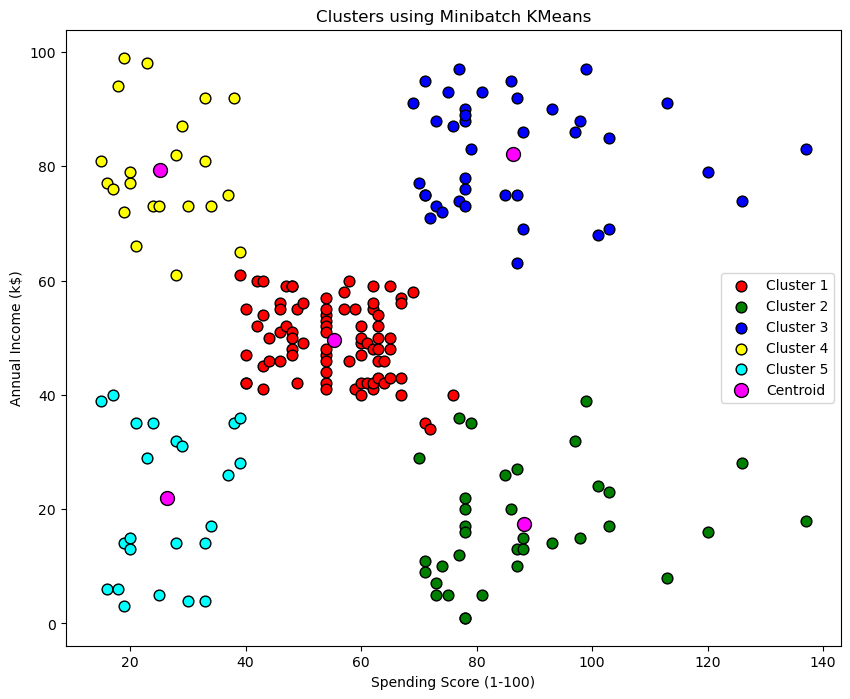

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a figure with a specified size
fig = plt.figure(figsize=(10, 8))

# Plot the data points for each cluster with different colors and labels
# Cluster 1
plt.scatter(X[y_minikmeans == 0, 0], X[y_minikmeans == 0, 1], 
            color='red', s=60, label='Cluster 1', edgecolors='black')

# Cluster 2
plt.scatter(X[y_minikmeans == 1, 0], X[y_minikmeans == 1, 1], 
            color='green', s=60, label='Cluster 2', edgecolors='black')

# Cluster 3
plt.scatter(X[y_minikmeans == 2, 0], X[y_minikmeans == 2, 1], 
            color='blue', s=60, label='Cluster 3', edgecolors='black')

# Cluster 4
plt.scatter(X[y_minikmeans == 3, 0], X[y_minikmeans == 3, 1], 
            color='yellow', s=60, label='Cluster 4', edgecolors='black')

# Cluster 5
plt.scatter(X[y_minikmeans == 4, 0], X[y_minikmeans == 4, 1], 
            color='cyan', s=60, label='Cluster 5', edgecolors='black')

# Plot the centroids of the clusters
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], 
            color='magenta', s=100, label='Centroid', edgecolors='black')

# Add a legend to the plot
plt.legend()

# Add a title to the plot
plt.title('Clusters using Minibatch KMeans')

# Label the y-axis
plt.ylabel('Annual Income (k$)')

# Label the x-axis
plt.xlabel('Spending Score (1-100)')

# Display the plot
plt.show()


As we can see, the output is nearly the same as what was observed in the last post on KMeans.